<a href="https://colab.research.google.com/github/dougyd92/ML-Foudations/blob/main/Notebooks/5_Classification_Logistic_Regression_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Classification & Logistic Regression

In this notebook, we'll explore **classification** — predicting discrete categories rather than continuous values. We'll focus on **logistic regression**, the foundational algorithm for binary classification that also serves as a building block for neural networks.

**What we'll cover:**
- The sigmoid function and its properties
- How logistic regression makes predictions
- Decision boundaries and how they separate classes
- Training with binary cross-entropy loss
- Logistic regression in scikit-learn
- Regularization for classification

## Setup and Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, make_classification, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set default figure style
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

---
# Section 1: The Sigmoid Function

## Why Sigmoid?

For classification, we need outputs between 0 and 1 (probabilities). Linear regression gives unbounded outputs, so we need a function to "squash" any real number into the (0, 1) range.

The **sigmoid function** (also called the logistic function) does exactly this:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**Key properties:**
- $\sigma(0) = 0.5$ (neutral point)
- $\sigma(z) \rightarrow 1$ as $z \rightarrow +\infty$
- $\sigma(z) \rightarrow 0$ as $z \rightarrow -\infty$
- Smooth and differentiable everywhere (important for gradient descent)

In [ ]:
# Define the sigmoid function
def sigmoid(z):
    """Compute the sigmoid of z."""
    return 1 / (1 + np.exp(-z))

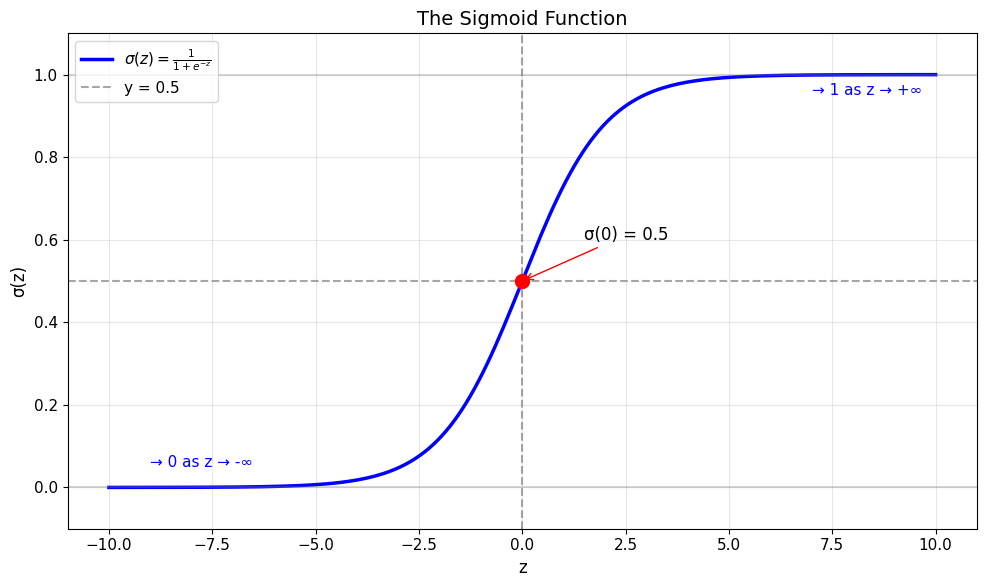

In [ ]:
# Visualize the sigmoid function
z = np.linspace(-10, 10, 200)
sigma_z = sigmoid(z)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(z, sigma_z, 'b-', linewidth=2.5, label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$')

# Mark key points
ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, label='y = 0.5')
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
ax.axhline(y=1, color='gray', linestyle='-', alpha=0.3)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.7)

# Mark sigmoid(0) = 0.5
ax.plot(0, 0.5, 'ro', markersize=10, zorder=5)
ax.annotate('σ(0) = 0.5', xy=(0, 0.5), xytext=(1.5, 0.6), fontsize=12,
            arrowprops=dict(arrowstyle='->', color='red'))

ax.set_xlabel('z', fontsize=12)
ax.set_ylabel('σ(z)', fontsize=12)
ax.set_title('The Sigmoid Function', fontsize=14)
ax.legend(loc='upper left', fontsize=11)
ax.set_ylim(-0.1, 1.1)
ax.grid(True, alpha=0.3)

# Add annotations for asymptotes
ax.annotate('→ 1 as z → +∞', xy=(7, 0.95), fontsize=11, color='blue')
ax.annotate('→ 0 as z → -∞', xy=(-9, 0.05), fontsize=11, color='blue')

plt.tight_layout()
plt.show()

In [ ]:
# Demonstrate sigmoid properties
print("Sigmoid Function Properties:")
print("=" * 40)
test_values = [-1000, -100, -10, -5, -2, -1, 0, 1, 2, 5, 10, 100, 1000]
for val in test_values:
    print(f"σ({val:3d}) = {sigmoid(val):.25f}")

Sigmoid Function Properties:
σ(-1000) = 0.0000000000000000000000000
σ(-100) = 0.0000000000000000000000000
σ(-10) = 0.0000453978687024343945805
σ( -5) = 0.0066928509242848554378069
σ( -2) = 0.1192029220221175467298025
σ( -1) = 0.2689414213699951039515668
σ(  0) = 0.5000000000000000000000000
σ(  1) = 0.7310585786300048960484332
σ(  2) = 0.8807970779778823144923194
σ(  5) = 0.9933071490757152677275599
σ( 10) = 0.9999546021312976096240277
σ(100) = 1.0000000000000000000000000
σ(1000) = 1.0000000000000000000000000


## How Weights Affect the Sigmoid

In logistic regression, we compute $z = w_0 + w_1 x$ (for a single feature), then apply sigmoid.

- **The weight $w_1$** controls the steepness of the curve
- **The bias $w_0$** shifts the curve left or right

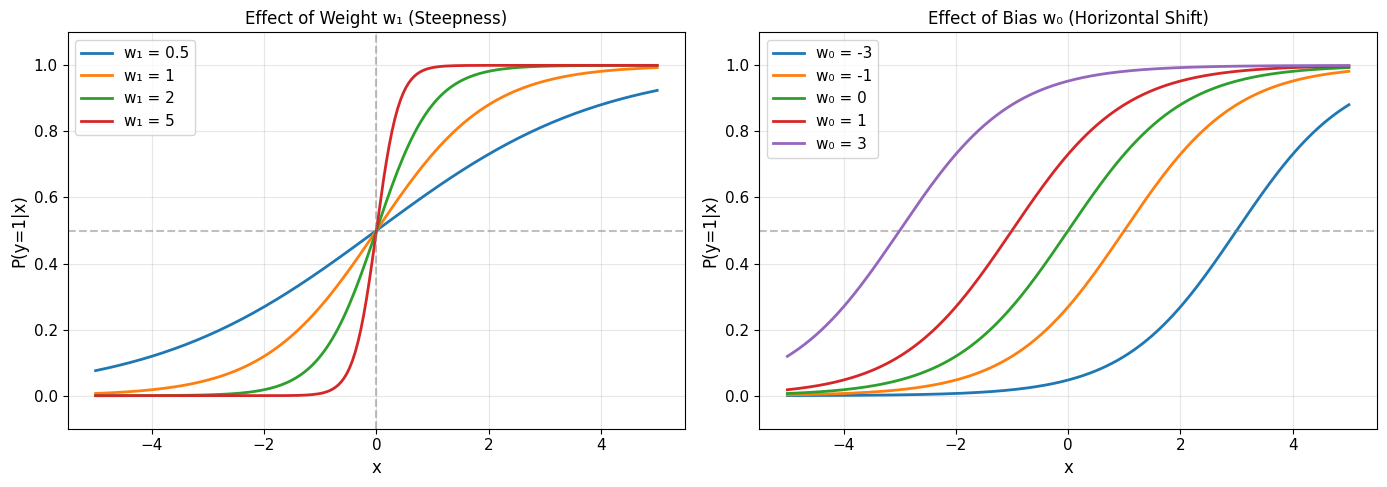

In [ ]:
# Show how weights affect the sigmoid shape
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(-5, 5, 200)

# Effect of weight (steepness)
ax = axes[0]
for w1 in [0.5, 1, 2, 5]:
    z = w1 * x  # w0 = 0
    ax.plot(x, sigmoid(z), linewidth=2, label=f'w₁ = {w1}')

ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('P(y=1|x)', fontsize=12)
ax.set_title('Effect of Weight w₁ (Steepness)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim(-0.1, 1.1)

# Effect of bias (shift)
ax = axes[1]
for w0 in [-3, -1, 0, 1, 3]:
    z = w0 + 1 * x  # w1 = 1
    ax.plot(x, sigmoid(z), linewidth=2, label=f'w₀ = {w0}')

ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('P(y=1|x)', fontsize=12)
ax.set_title('Effect of Bias w₀ (Horizontal Shift)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

## EXERCISE 1: Sigmoid Exploration

1. Implement the sigmoid function yourself (without looking at the one above)
2. For z = [-3, -1, 0, 1, 3], compute the sigmoid values
3. If we use a threshold of 0.5, which z values would be classified as class 1?
4. What if we use a threshold of 0.7 instead?

In [ ]:
# 1. Implement the sigmoid function

def my_sigmoid(z):
    # Write your code here
    pass


In [ ]:
#@title Click to reveal solution.

# 1. Implement the sigmoid function
def my_sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Test it
print("Testing my_sigmoid:")
print(f"my_sigmoid(0) = {my_sigmoid(0)}")
print(f"my_sigmoid(5) = {my_sigmoid(5):.4f}")

In [ ]:
# 2. Compute sigmoid for z = [-3, -1, 0, 1, 3]

z_values = np.array([-3, -1, 0, 1, 3])

# Write your code here


In [ ]:
#@title Click to reveal solution.

# 2. Compute sigmoid for z = [-3, -1, 0, 1, 3]
z_values = np.array([-3, -1, 0, 1, 3])
probabilities = my_sigmoid(z_values)

print("z values and their sigmoid outputs:")
for z_val, prob in zip(z_values, probabilities):
    print(f"  z = {z_val:2d} → σ(z) = {prob:.4f}")

In [ ]:
# 3. Which z values would be classified as class 1 with threshold 0.5?

# Write your code here


In [ ]:
#@title Click to reveal solution.

# 3. Which z values would be classified as class 1 with threshold 0.5?
threshold = 0.5
predictions_05 = (probabilities >= threshold).astype(int)

print(f"With threshold = {threshold}:")
for z_val, prob, pred in zip(z_values, probabilities, predictions_05):
    print(f"  z = {z_val:2d} → P = {prob:.4f} → Class {pred}")

print(f"\nClass 1 predictions: z = {z_values[predictions_05 == 1]}")

In [ ]:
# 4. What if we use a threshold of 0.7 instead?

# Write your code here


In [ ]:
#@title Click to reveal solution.

# 4. What if we use a threshold of 0.7 instead?
threshold = 0.7
predictions_07 = (probabilities >= threshold).astype(int)

print(f"With threshold = {threshold}:")
for z_val, prob, pred in zip(z_values, probabilities, predictions_07):
    print(f"  z = {z_val:2d} → P = {prob:.4f} → Class {pred}")

print(f"\nClass 1 predictions: z = {z_values[predictions_07 == 1]}")
print("\nObservation: Higher threshold → fewer positive predictions (more conservative)")

---
# Section 2: Logistic Regression Fundamentals

## From Linear Combination to Probability

Logistic regression works in three steps:

1. **Linear combination**: $z = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n = \mathbf{w}^T \mathbf{x}$
2. **Apply sigmoid**: $P(y=1|\mathbf{x}) = \sigma(z) = \frac{1}{1 + e^{-z}}$
3. **Threshold**: If $P(y=1|\mathbf{x}) \geq 0.5$, predict class 1; otherwise predict class 0

The **weights** determine feature importance, and the **bias** shifts the decision boundary.

In [ ]:
# Step-by-step example with a single sample
print("Step-by-Step Logistic Regression Prediction")
print("=" * 50)

# Suppose we have 2 features and known weights
w0 = -1.5  # bias
w1 = 2.0   # weight for feature 1
w2 = 1.0   # weight for feature 2

# Sample to classify
x1, x2 = 1.0, 0.5

print(f"\nWeights: w₀ = {w0}, w₁ = {w1}, w₂ = {w2}")
print(f"Sample: x₁ = {x1}, x₂ = {x2}")

# Step 1: Linear combination
z = w0 + w1 * x1 + w2 * x2
print(f"\nStep 1: z = w₀ + w₁x₁ + w₂x₂")
print(f"        z = {w0} + {w1}×{x1} + {w2}×{x2}")
print(f"        z = {z}")

# Step 2: Apply sigmoid
prob = sigmoid(z)
print(f"\nStep 2: P(y=1|x) = σ(z) = σ({z})")
print(f"        P(y=1|x) = {prob:.4f}")

# Step 3: Threshold
prediction = 1 if prob >= 0.5 else 0
print(f"\nStep 3: Since {prob:.4f} {'≥' if prob >= 0.5 else '<'} 0.5")
print(f"        Prediction: Class {prediction}")

Step-by-Step Logistic Regression Prediction

Weights: w₀ = -1.5, w₁ = 2.0, w₂ = 1.0
Sample: x₁ = 1.0, x₂ = 0.5

Step 1: z = w₀ + w₁x₁ + w₂x₂
        z = -1.5 + 2.0×1.0 + 1.0×0.5
        z = 1.0

Step 2: P(y=1|x) = σ(z) = σ(1.0)
        P(y=1|x) = 0.7311

Step 3: Since 0.7311 ≥ 0.5
        Prediction: Class 1


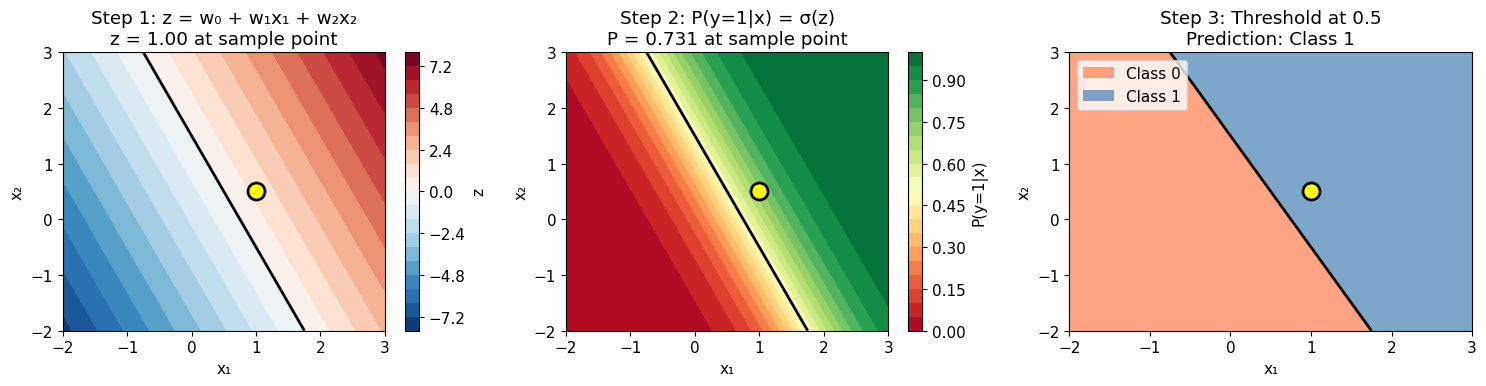

In [ ]:
# Visualize the prediction process
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Create a grid of points
x1_range = np.linspace(-2, 3, 100)
x2_range = np.linspace(-2, 3, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Compute z and probability for each point
Z = w0 + w1 * X1 + w2 * X2
P = sigmoid(Z)

# Plot 1: Linear combination (z values)
ax = axes[0]
contour = ax.contourf(X1, X2, Z, levels=20, cmap='RdBu_r')
ax.contour(X1, X2, Z, levels=[0], colors='black', linewidths=2)
ax.scatter([x1], [x2], color='yellow', s=150, edgecolors='black', linewidth=2, zorder=5)
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_title(f'Step 1: z = w₀ + w₁x₁ + w₂x₂\nz = {z:.2f} at sample point')
plt.colorbar(contour, ax=ax, label='z')

# Plot 2: Probability
ax = axes[1]
contour = ax.contourf(X1, X2, P, levels=20, cmap='RdYlGn')
ax.contour(X1, X2, P, levels=[0.5], colors='black', linewidths=2)
ax.scatter([x1], [x2], color='yellow', s=150, edgecolors='black', linewidth=2, zorder=5)
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_title(f'Step 2: P(y=1|x) = σ(z)\nP = {prob:.3f} at sample point')
plt.colorbar(contour, ax=ax, label='P(y=1|x)')

# Plot 3: Classification
ax = axes[2]
predictions = (P >= 0.5).astype(int)
ax.contourf(X1, X2, predictions, levels=[-0.5, 0.5, 1.5], colors=['coral', 'steelblue'], alpha=0.7)
ax.contour(X1, X2, P, levels=[0.5], colors='black', linewidths=2)
ax.scatter([x1], [x2], color='yellow', s=150, edgecolors='black', linewidth=2, zorder=5)
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_title(f'Step 3: Threshold at 0.5\nPrediction: Class {prediction}')

# Add legend for classes
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='coral', alpha=0.7, label='Class 0'),
                   Patch(facecolor='steelblue', alpha=0.7, label='Class 1')]
ax.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()

## Log Odds (Logit) Interpretation

The **logit function** is the inverse of sigmoid:

$$\text{logit}(p) = \log\left(\frac{p}{1-p}\right) = z = \mathbf{w}^T \mathbf{x}$$

This means logistic regression models the **log-odds** as a linear function of features. The term $\frac{p}{1-p}$ is called the **odds ratio**.

In [ ]:
# Demonstrate odds and log-odds
print("Probability, Odds, and Log-Odds")
print("=" * 50)
print(f"{'Probability':>12} {'Odds':>10} {'Log-Odds':>12}")
print("-" * 50)

probabilities = [0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
for p in probabilities:
    odds = p / (1 - p)
    log_odds = np.log(odds)
    print(f"{p:>12.2f} {odds:>10.2f} {log_odds:>12.2f}")

print("\nKey insight: When p = 0.5, odds = 1, and log-odds = 0")

Probability, Odds, and Log-Odds
 Probability       Odds     Log-Odds
--------------------------------------------------
        0.10       0.11        -2.20
        0.25       0.33        -1.10
        0.50       1.00         0.00
        0.75       3.00         1.10
        0.90       9.00         2.20
        0.99      99.00         4.60

Key insight: When p = 0.5, odds = 1, and log-odds = 0


---
# Section 3: Decision Boundaries

## Linear Decision Boundaries

The **decision boundary** is where $P(y=1|\mathbf{x}) = 0.5$, which corresponds to $z = \mathbf{w}^T \mathbf{x} = 0$.

For two features: $w_0 + w_1 x_1 + w_2 x_2 = 0$

Rearranging: $x_2 = -\frac{w_0}{w_2} - \frac{w_1}{w_2} x_1$

This is a **line** in 2D space that separates the two classes.

In [ ]:
# Create a synthetic 2D dataset for visualization
X_2d, y_2d = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

# Split the data
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y_2d, test_size=0.3, random_state=42
)

print(f"Training samples: {len(X_train_2d)}")
print(f"Test samples: {len(X_test_2d)}")
print(f"Class distribution in training: {np.bincount(y_train_2d)}")

Training samples: 140
Test samples: 60
Class distribution in training: [66 74]


In [ ]:
# Train logistic regression and visualize the decision boundary
logreg_2d = LogisticRegression(random_state=42)
logreg_2d.fit(X_train_2d, y_train_2d)

# Get the coefficients
w0 = logreg_2d.intercept_[0]
w1, w2 = logreg_2d.coef_[0]

print(f"Learned weights: w₀ = {w0:.3f}, w₁ = {w1:.3f}, w₂ = {w2:.3f}")
print(f"\nDecision boundary equation: {w0:.3f} + {w1:.3f}x₁ + {w2:.3f}x₂ = 0")
print(f"Rearranged: x₂ = {-w0/w2:.3f} + {-w1/w2:.3f}x₁")

Learned weights: w₀ = 0.911, w₁ = 2.380, w₂ = -0.614

Decision boundary equation: 0.911 + 2.380x₁ + -0.614x₂ = 0
Rearranged: x₂ = 1.483 + 3.877x₁


In [ ]:
# Helper function to plot decision boundary
def plot_decision_boundary(model, X, y, ax=None, title="Decision Boundary"):
    """Plot the decision boundary of a classifier."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Get predictions for mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision regions
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    ax.contour(xx, yy, Z, colors='black', linewidths=1)

    # Plot data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu',
                         edgecolors='black', s=50)

    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_title(title)

    return ax

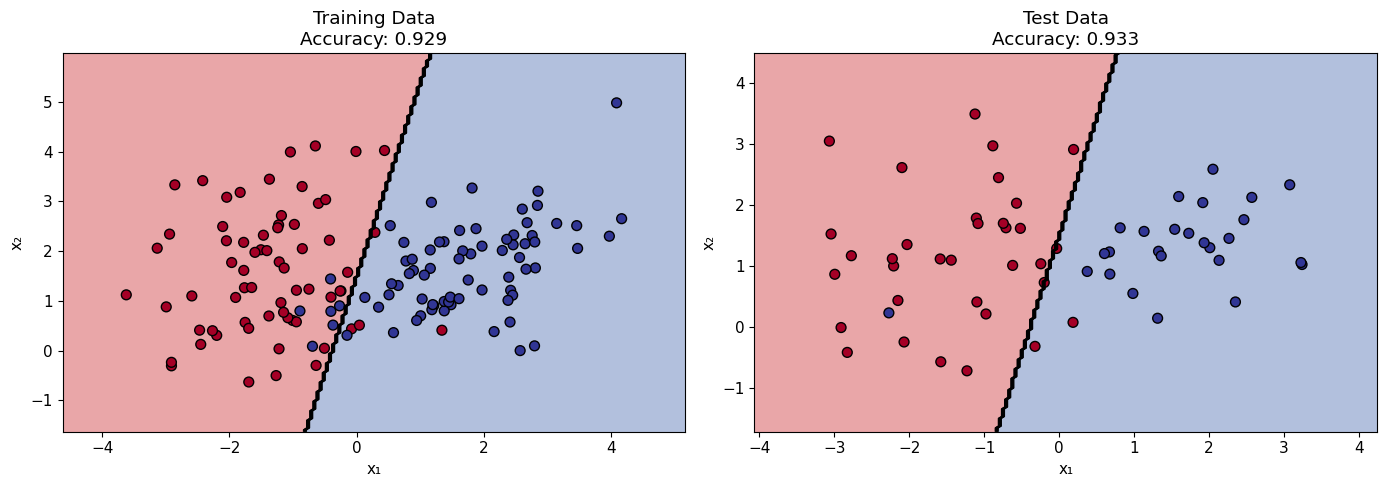

In [ ]:
# Visualize the decision boundary
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training data
plot_decision_boundary(logreg_2d, X_train_2d, y_train_2d, ax=axes[0],
                       title=f'Training Data\nAccuracy: {logreg_2d.score(X_train_2d, y_train_2d):.3f}')

# Test data
plot_decision_boundary(logreg_2d, X_test_2d, y_test_2d, ax=axes[1],
                       title=f'Test Data\nAccuracy: {logreg_2d.score(X_test_2d, y_test_2d):.3f}')

plt.tight_layout()
plt.show()

## How Weights Define the Boundary

Let's see how changing the weights affects the decision boundary.

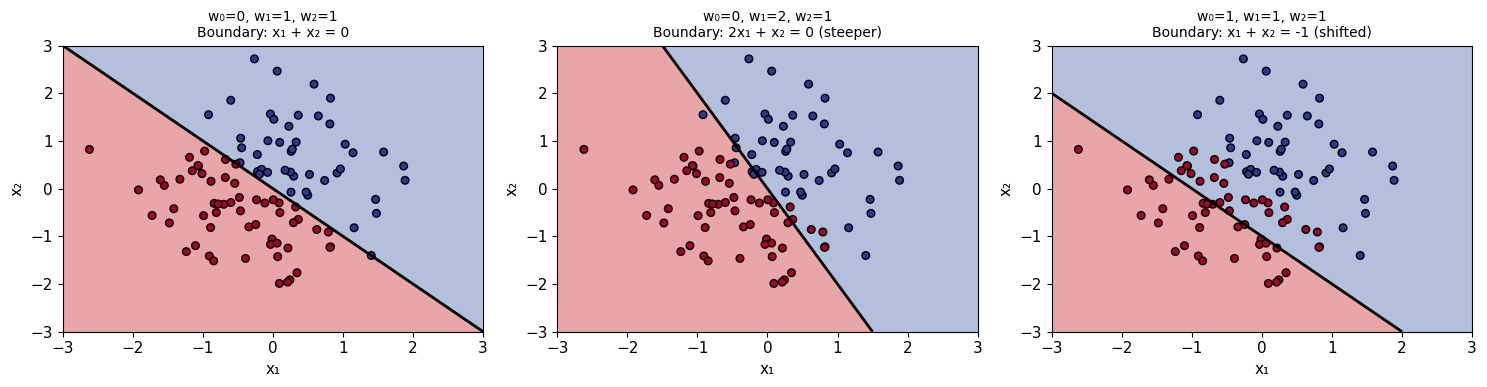

In [ ]:
# Demonstrate how weights affect the decision boundary
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Generate data
np.random.seed(42)
X_demo = np.random.randn(100, 2)
y_demo = (X_demo[:, 0] + X_demo[:, 1] > 0).astype(int)

# Different weight configurations
weight_configs = [
    (0, 1, 1, "w₀=0, w₁=1, w₂=1\nBoundary: x₁ + x₂ = 0"),
    (0, 2, 1, "w₀=0, w₁=2, w₂=1\nBoundary: 2x₁ + x₂ = 0 (steeper)"),
    (1, 1, 1, "w₀=1, w₁=1, w₂=1\nBoundary: x₁ + x₂ = -1 (shifted)"),
]

for ax, (w0, w1, w2, title) in zip(axes, weight_configs):
    # Create mesh
    x_range = np.linspace(-3, 3, 200)
    y_range = np.linspace(-3, 3, 200)
    xx, yy = np.meshgrid(x_range, y_range)

    # Compute z and predictions
    Z = w0 + w1 * xx + w2 * yy
    preds = (sigmoid(Z) >= 0.5).astype(int)

    # Plot
    ax.contourf(xx, yy, preds, alpha=0.4, cmap='RdYlBu')
    ax.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)
    ax.scatter(X_demo[:, 0], X_demo[:, 1], c=y_demo, cmap='RdYlBu', edgecolors='black', s=30)
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_title(title, fontsize=10)
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)

plt.tight_layout()
plt.show()

## Non-Linear Decision Boundaries

Logistic regression creates **linear** boundaries. For curved boundaries, we can add **polynomial features**.

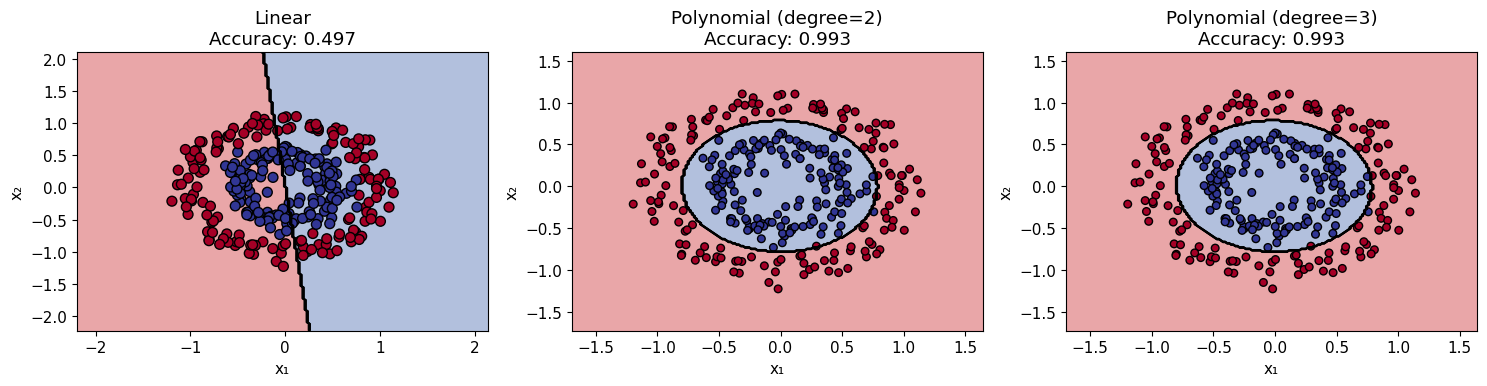


Feature counts: Linear = 2, Degree 2 = 6, Degree 3 = 10


In [ ]:
# Create a dataset that requires a non-linear boundary
X_circles, y_circles = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)

# Train with and without polynomial features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Linear (no polynomial features)
logreg_linear = LogisticRegression(random_state=42)
logreg_linear.fit(X_circles, y_circles)
plot_decision_boundary(logreg_linear, X_circles, y_circles, ax=axes[0],
                       title=f'Linear\nAccuracy: {logreg_linear.score(X_circles, y_circles):.3f}')

# Degree 2 polynomial features
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X_circles)
logreg_poly2 = LogisticRegression(random_state=42, max_iter=1000)
logreg_poly2.fit(X_poly2, y_circles)

# Plot with polynomial model
ax = axes[1]
x_min, x_max = X_circles[:, 0].min() - 0.5, X_circles[:, 0].max() + 0.5
y_min, y_max = X_circles[:, 1].min() - 0.5, X_circles[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
X_mesh = poly2.transform(np.c_[xx.ravel(), yy.ravel()])
Z = logreg_poly2.predict(X_mesh).reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
ax.contour(xx, yy, Z, colors='black', linewidths=1)
ax.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='RdYlBu', edgecolors='black', s=30)
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_title(f'Polynomial (degree=2)\nAccuracy: {logreg_poly2.score(X_poly2, y_circles):.3f}')

# Degree 3 polynomial features
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X_circles)
logreg_poly3 = LogisticRegression(random_state=42, max_iter=1000)
logreg_poly3.fit(X_poly3, y_circles)

ax = axes[2]
X_mesh = poly3.transform(np.c_[xx.ravel(), yy.ravel()])
Z = logreg_poly3.predict(X_mesh).reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
ax.contour(xx, yy, Z, colors='black', linewidths=1)
ax.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='RdYlBu', edgecolors='black', s=30)
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_title(f'Polynomial (degree=3)\nAccuracy: {logreg_poly3.score(X_poly3, y_circles):.3f}')

plt.tight_layout()
plt.show()

print(f"\nFeature counts: Linear = 2, Degree 2 = {X_poly2.shape[1]}, Degree 3 = {X_poly3.shape[1]}")

## EXERCISE 2: Decision Boundary Visualization

1. Create a new synthetic 2D dataset using `make_classification` with `class_sep=2.0` (more separated classes)
2. Train a logistic regression model on this data
3. Print the learned weights (intercept and coefficients)
4. Calculate the training accuracy

In [ ]:
# 1. Create a new synthetic 2D dataset with class_sep=2.0

# Write your code here


In [ ]:
#@title Click to reveal solution.

# 1. Create a new synthetic 2D dataset with class_sep=2.0
X_ex, y_ex = make_classification(
    n_samples=200,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2.0,  # More separation
    random_state=123
)

print(f"Dataset shape: {X_ex.shape}")
print(f"Class distribution: {np.bincount(y_ex)}")

In [ ]:
# 2. Train a logistic regression model

# Write your code here


In [ ]:
#@title Click to reveal solution.

# 2. Train a logistic regression model
logreg_ex = LogisticRegression(random_state=42)
logreg_ex.fit(X_ex, y_ex)

print("Model trained!")

In [ ]:
# 3. Print the learned weights

# Write your code here


In [ ]:
#@title Click to reveal solution.

# 3. Print the learned weights
print("Learned weights:")
print(f"  Intercept (w₀): {logreg_ex.intercept_[0]:.4f}")
print(f"  Coefficient 1 (w₁): {logreg_ex.coef_[0, 0]:.4f}")
print(f"  Coefficient 2 (w₂): {logreg_ex.coef_[0, 1]:.4f}")

In [ ]:
# 4. Calculate the training accuracy and visualize

# Write your code here


In [ ]:
#@title Click to reveal solution.

# 4. Calculate the training accuracy and visualize
accuracy = logreg_ex.score(X_ex, y_ex)
print(f"Training accuracy: {accuracy:.4f}")

# Visualize
fig, ax = plt.subplots(figsize=(8, 6))
plot_decision_boundary(logreg_ex, X_ex, y_ex, ax=ax,
                       title=f'Decision Boundary (class_sep=2.0)\nAccuracy: {accuracy:.3f}')
plt.show()

print("\nObservation: With higher class separation, the model achieves higher accuracy!")

---
# Section 4: Training & Loss Function

## Why Not Mean Squared Error?

For linear regression, we use MSE: $\frac{1}{n}\sum(y - \hat{y})^2$

For logistic regression, MSE creates a **non-convex** loss surface with many local minima. We need a different loss function.

## Binary Cross-Entropy (Log Loss)

The loss function for logistic regression:

$$\mathcal{L}(y, \hat{y}) = -\left[ y \log(\hat{y}) + (1-y) \log(1-\hat{y}) \right]$$

Where $\hat{y} = P(y=1|\mathbf{x})$ is the predicted probability.

**Intuition:**
- When $y=1$: Loss = $-\log(\hat{y})$ → penalizes low predicted probability
- When $y=0$: Loss = $-\log(1-\hat{y})$ → penalizes high predicted probability

In [ ]:
# Define log loss function
def log_loss_single(y_true, y_pred):
    """Compute log loss for a single sample."""
    epsilon = 1e-15  # Avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

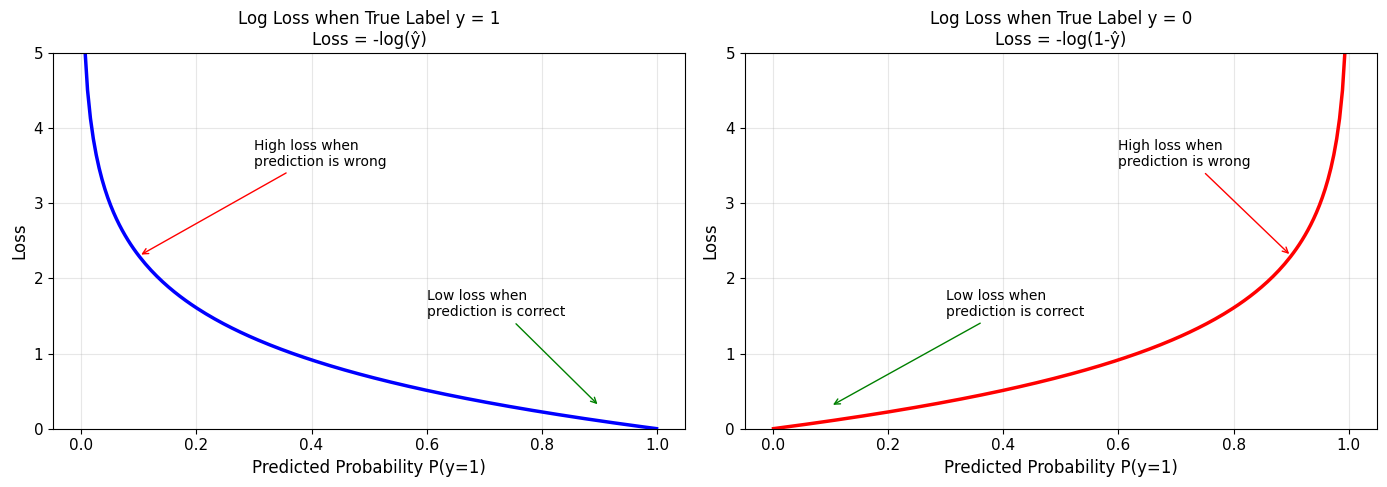

In [ ]:
# Visualize log loss
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

y_pred_range = np.linspace(0.001, 0.999, 200)

# When y = 1
ax = axes[0]
loss_y1 = -np.log(y_pred_range)  # -log(y_hat)
ax.plot(y_pred_range, loss_y1, 'b-', linewidth=2.5)
ax.set_xlabel('Predicted Probability P(y=1)', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.set_title('Log Loss when True Label y = 1\nLoss = -log(ŷ)', fontsize=12)
ax.set_ylim(0, 5)
ax.grid(True, alpha=0.3)

# Annotate
ax.annotate('Low loss when\nprediction is correct', xy=(0.9, 0.3), fontsize=10,
            xytext=(0.6, 1.5), arrowprops=dict(arrowstyle='->', color='green'))
ax.annotate('High loss when\nprediction is wrong', xy=(0.1, 2.3), fontsize=10,
            xytext=(0.3, 3.5), arrowprops=dict(arrowstyle='->', color='red'))

# When y = 0
ax = axes[1]
loss_y0 = -np.log(1 - y_pred_range)  # -log(1 - y_hat)
ax.plot(y_pred_range, loss_y0, 'r-', linewidth=2.5)
ax.set_xlabel('Predicted Probability P(y=1)', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.set_title('Log Loss when True Label y = 0\nLoss = -log(1-ŷ)', fontsize=12)
ax.set_ylim(0, 5)
ax.grid(True, alpha=0.3)

# Annotate
ax.annotate('Low loss when\nprediction is correct', xy=(0.1, 0.3), fontsize=10,
            xytext=(0.3, 1.5), arrowprops=dict(arrowstyle='->', color='green'))
ax.annotate('High loss when\nprediction is wrong', xy=(0.9, 2.3), fontsize=10,
            xytext=(0.6, 3.5), arrowprops=dict(arrowstyle='->', color='red'))

plt.tight_layout()
plt.show()

In [ ]:
# Demonstrate log loss values
print("Log Loss Examples:")
print("=" * 50)

examples = [
    (1, 0.9, "Correct, confident"),
    (1, 0.6, "Correct, uncertain"),
    (1, 0.3, "Wrong, uncertain"),
    (1, 0.1, "Wrong, confident"),
    (0, 0.1, "Correct, confident"),
    (0, 0.4, "Correct, uncertain"),
    (0, 0.7, "Wrong, uncertain"),
    (0, 0.9, "Wrong, confident"),
]

print(f"{'True y':>8} {'Pred ŷ':>8} {'Loss':>10} {'Description'}")
print("-" * 50)
for y_true, y_pred, desc in examples:
    loss = log_loss_single(y_true, y_pred)
    print(f"{y_true:>8} {y_pred:>8.1f} {loss:>10.4f} {desc}")

Log Loss Examples:
  True y   Pred ŷ       Loss Description
--------------------------------------------------
       1      0.9     0.1054 Correct, confident
       1      0.6     0.5108 Correct, uncertain
       1      0.3     1.2040 Wrong, uncertain
       1      0.1     2.3026 Wrong, confident
       0      0.1     0.1054 Correct, confident
       0      0.4     0.5108 Correct, uncertain
       0      0.7     1.2040 Wrong, uncertain
       0      0.9     2.3026 Wrong, confident


**Key Insight:** Log loss penalizes **confident wrong predictions** very heavily! This encourages the model to be well-calibrated.

## Gradient Descent for Logistic Regression

Like linear regression, we use gradient descent to find optimal weights:

$$w := w - \alpha \nabla J(w)$$

The gradient computation uses the chain rule through the sigmoid function. Fortunately, sklearn handles this for us!

---
# Section 5: Logistic Regression in Scikit-Learn

## The Breast Cancer Dataset

Let's apply logistic regression to a real dataset: predicting whether a breast tumor is malignant or benign based on cell measurements.

In [ ]:
# Load the breast cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target  # 0 = malignant, 1 = benign

print("Breast Cancer Wisconsin Dataset")
print("=" * 50)
print(f"Number of samples: {len(y)}")
print(f"Number of features: {X.shape[1]}")
print(f"\nTarget classes:")
print(f"  0 = {cancer.target_names[0]} (malignant)")
print(f"  1 = {cancer.target_names[1]} (benign)")
print(f"\nClass distribution: {np.bincount(y)}")

Breast Cancer Wisconsin Dataset
Number of samples: 569
Number of features: 30

Target classes:
  0 = malignant (malignant)
  1 = benign (benign)

Class distribution: [212 357]


In [ ]:
# Look at the features
print("Features:")
for i, name in enumerate(cancer.feature_names[:10]):
    print(f"  {i+1:2d}. {name}")
print(f"  ... and {len(cancer.feature_names) - 10} more")

Features:
   1. mean radius
   2. mean texture
   3. mean perimeter
   4. mean area
   5. mean smoothness
   6. mean compactness
   7. mean concavity
   8. mean concave points
   9. mean symmetry
  10. mean fractal dimension
  ... and 20 more


In [ ]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print(f"\nTraining class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

Training set: 455 samples
Test set: 114 samples

Training class distribution: [170 285]
Test class distribution: [42 72]


In [ ]:
# Scale the features (important for logistic regression!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")
print(f"Training mean (should be ~0): {X_train_scaled.mean():.6f}")
print(f"Training std (should be ~1): {X_train_scaled.std():.6f}")

Features scaled using StandardScaler
Training mean (should be ~0): -0.000000
Training std (should be ~1): 1.000000


## Training and Evaluating the Model

In [ ]:
# Train logistic regression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Evaluate
train_accuracy = logreg.score(X_train_scaled, y_train)
test_accuracy = logreg.score(X_test_scaled, y_test)

print("Model Performance:")
print(f"  Training accuracy: {train_accuracy:.4f}")
print(f"  Test accuracy: {test_accuracy:.4f}")

Model Performance:
  Training accuracy: 0.9890
  Test accuracy: 0.9825


## Making Predictions

In [ ]:
# Get predictions and probabilities
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)

print("Predictions for first 10 test samples:")
print("=" * 60)
print(f"{'Index':>6} {'Actual':>10} {'Pred':>10} {'P(malign)':>10} {'P(benign)':>10} {'Status':>3}")
print("-" * 60)
for i in range(10):
    true_label = cancer.target_names[y_test[i]]
    pred_label = cancer.target_names[y_pred[i]]
    correct = "✓" if y_test[i] == y_pred[i] else "✗"
    print(f"{i:>6} {true_label:>10} {pred_label:>10} {y_proba[i, 0]:>10.4f} {y_proba[i, 1]:>10.4f} {correct:>3}")

Predictions for first 10 test samples:
 Index     Actual       Pred  P(malign)  P(benign) Status
------------------------------------------------------------
     0  malignant  malignant     1.0000     0.0000   ✓
     1     benign     benign     0.0000     1.0000   ✓
     2  malignant  malignant     0.9936     0.0064   ✓
     3     benign     benign     0.4665     0.5335   ✓
     4  malignant  malignant     1.0000     0.0000   ✓
     5     benign     benign     0.0078     0.9922   ✓
     6     benign     benign     0.0000     1.0000   ✓
     7  malignant  malignant     1.0000     0.0000   ✓
     8  malignant  malignant     0.9999     0.0001   ✓
     9  malignant  malignant     1.0000     0.0000   ✓


## Interpreting Coefficients

In logistic regression:
- **Positive coefficient** → feature increases probability of class 1 (benign)
- **Negative coefficient** → feature increases probability of class 0 (malignant)
- **Magnitude** indicates strength of influence

With scaled features, coefficients are directly comparable!

In [ ]:
# Analyze coefficients
coef_df = pd.DataFrame({
    'Feature': cancer.feature_names,
    'Coefficient': logreg.coef_[0]
})
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("Top 10 Most Important Features:")
print("=" * 50)
print(coef_df.head(10).to_string(index=False))

Top 10 Most Important Features:
             Feature  Coefficient  Abs_Coefficient
       worst texture    -1.255088         1.255088
        radius error    -1.082965         1.082965
worst concave points    -0.953686         0.953686
          worst area    -0.947756         0.947756
        worst radius    -0.947616         0.947616
      worst symmetry    -0.939181         0.939181
          area error    -0.929104         0.929104
     worst concavity    -0.823151         0.823151
     worst perimeter    -0.763220         0.763220
    worst smoothness    -0.746625         0.746625


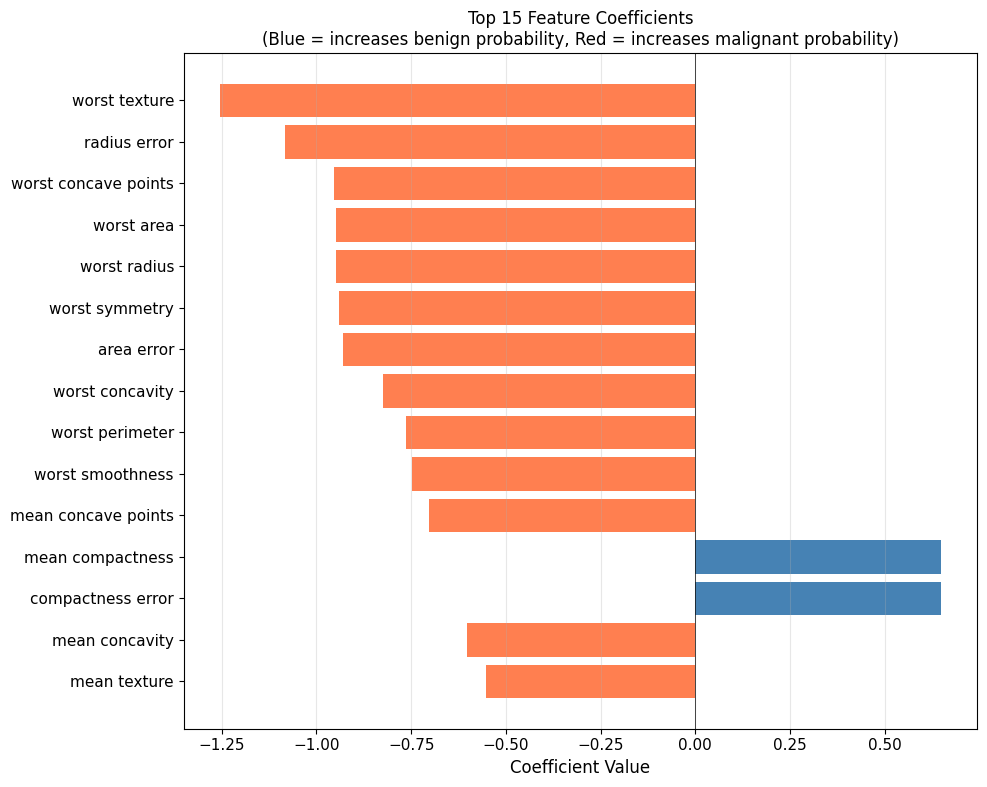

In [ ]:
# Visualize top coefficients
fig, ax = plt.subplots(figsize=(10, 8))

top_n = 15
top_coefs = coef_df.head(top_n)

colors = ['coral' if c < 0 else 'steelblue' for c in top_coefs['Coefficient']]
bars = ax.barh(range(top_n), top_coefs['Coefficient'], color=colors)

ax.set_yticks(range(top_n))
ax.set_yticklabels(top_coefs['Feature'])
ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_title('Top 15 Feature Coefficients\n(Blue = increases benign probability, Red = increases malignant probability)', fontsize=12)
ax.axvline(x=0, color='black', linewidth=0.5)
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## EXERCISE 3: Full Classification Pipeline

Using the breast cancer dataset:

1. Train a new logistic regression model (you can use the already scaled data)
2. Get predictions on the test set
3. Get probability estimates for the test set
4. Find the 3 samples where the model is most uncertain (probability closest to 0.5)
5. Identify the 3 most important features (largest absolute coefficients)

In [ ]:
# 1 & 2. Train model and get predictions

# Write your code here


In [ ]:
#@title Click to reveal solution.

# 1 & 2. Train model and get predictions
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)
print(f"Made {len(predictions)} predictions")
print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")

In [ ]:
# 3. Get probability estimates

# Write your code here


In [ ]:
#@title Click to reveal solution.

# 3. Get probability estimates
probabilities = model.predict_proba(X_test_scaled)
print(f"Probability shape: {probabilities.shape}")
print(f"\nFirst 5 probability estimates:")
print(f"  P(malignant) | P(benign)")
for i in range(5):
    print(f"  {probabilities[i, 0]:.4f}       | {probabilities[i, 1]:.4f}")

In [ ]:
# 4. Find 3 samples where model is most uncertain (probability closest to 0.5)

# Write your code here


In [ ]:
#@title Click to reveal solution.

# 4. Find 3 samples where model is most uncertain (probability closest to 0.5)
# Uncertainty = how close P(benign) is to 0.5
uncertainty = np.abs(probabilities[:, 1] - 0.5)
most_uncertain_idx = np.argsort(uncertainty)[:3]

print("3 Most Uncertain Predictions:")
print("=" * 50)
for idx in most_uncertain_idx:
    print(f"Sample {idx}: P(benign) = {probabilities[idx, 1]:.4f}, "
          f"True = {cancer.target_names[y_test.iloc[idx]]}, "
          f"Pred = {cancer.target_names[predictions[idx]]}")

In [ ]:
# 5. Identify 3 most important features

# Write your code here


In [ ]:
#@title Click to reveal solution.

# 5. Identify 3 most important features
feature_importance = pd.DataFrame({
    'Feature': cancer.feature_names,
    'Coefficient': model.coef_[0],
    'Abs_Coefficient': np.abs(model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("Top 3 Most Important Features:")
print("=" * 50)
for i, row in feature_importance.head(3).iterrows():
    direction = "↑ benign" if row['Coefficient'] > 0 else "↑ malignant"
    print(f"{row['Feature']}: {row['Coefficient']:.4f} ({direction})")

---
# Section 6: Regularization in Logistic Regression

## Regularization Review

Just like in linear regression, we can add regularization to logistic regression:

- **L2 (Ridge)**: Shrinks coefficients, keeps all features
- **L1 (Lasso)**: Can set coefficients to exactly zero (feature selection)

In sklearn's `LogisticRegression`:
- `penalty`: 'l1', 'l2', 'elasticnet', or 'none'
- `C`: Inverse of regularization strength (smaller C = stronger regularization)
  - Note: This is the **opposite** of `alpha` in Ridge/Lasso! $C = \frac{1}{\lambda}$

In [ ]:
# Compare different regularization strengths
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

print("Effect of Regularization Strength (C)")
print("=" * 70)
print("Note: Smaller C = stronger regularization")
print("-" * 70)

results = []
for C in C_values:
    model = LogisticRegression(C=C, random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)

    train_acc = model.score(X_train_scaled, y_train)
    test_acc = model.score(X_test_scaled, y_test)
    coef_norm = np.linalg.norm(model.coef_)
    n_nonzero = np.sum(np.abs(model.coef_) > 0.01)  # Near-zero threshold

    results.append({
        'C': C,
        'Train Acc': train_acc,
        'Test Acc': test_acc,
        'Coef Norm': coef_norm,
        'Large Coefs': n_nonzero
    })

    print(f"C = {C:6.3f}: Train = {train_acc:.4f}, Test = {test_acc:.4f}, ||w|| = {coef_norm:.2f}")

results_df = pd.DataFrame(results)

Effect of Regularization Strength (C)
Note: Smaller C = stronger regularization
----------------------------------------------------------------------
C =  0.001: Train = 0.8879, Test = 0.9298, ||w|| = 0.30
C =  0.010: Train = 0.9560, Test = 0.9474, ||w|| = 0.83
C =  0.100: Train = 0.9868, Test = 0.9737, ||w|| = 1.82
C =  1.000: Train = 0.9890, Test = 0.9825, ||w|| = 3.59
C = 10.000: Train = 0.9912, Test = 0.9649, ||w|| = 7.98
C = 100.000: Train = 0.9934, Test = 0.9474, ||w|| = 22.93


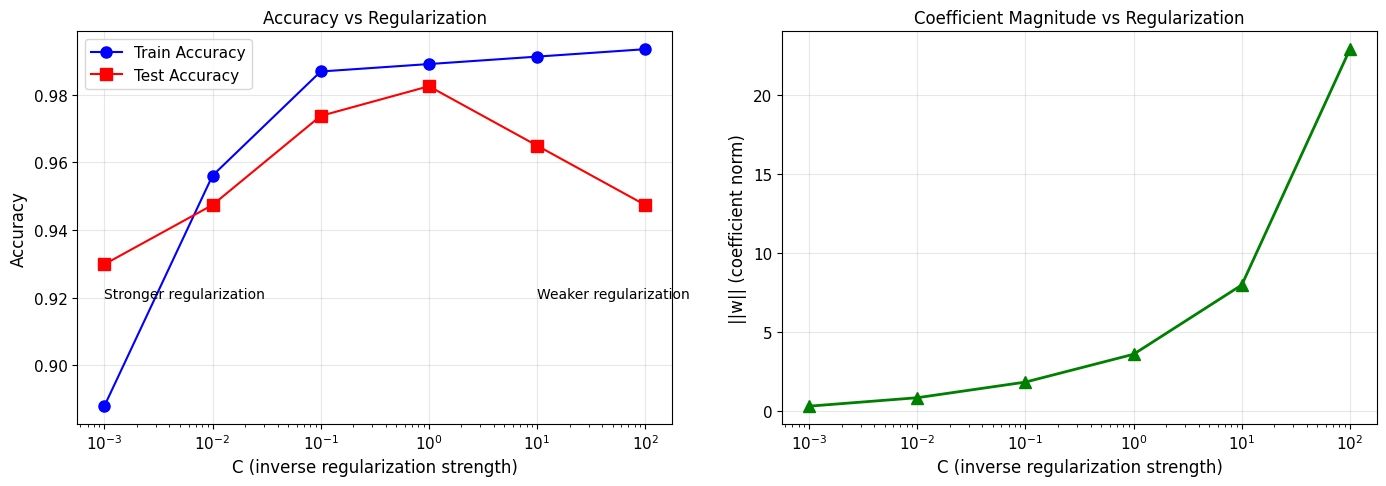

In [ ]:
# Visualize regularization effects
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy vs C
ax = axes[0]
ax.semilogx(results_df['C'], results_df['Train Acc'], 'b-o', label='Train Accuracy', markersize=8)
ax.semilogx(results_df['C'], results_df['Test Acc'], 'r-s', label='Test Accuracy', markersize=8)
ax.set_xlabel('C (inverse regularization strength)', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy vs Regularization', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)
ax.annotate('Stronger regularization', xy=(0.001, 0.92), fontsize=10)
ax.annotate('Weaker regularization', xy=(10, 0.92), fontsize=10)

# Coefficient norm vs C
ax = axes[1]
ax.semilogx(results_df['C'], results_df['Coef Norm'], 'g-^', markersize=8, linewidth=2)
ax.set_xlabel('C (inverse regularization strength)', fontsize=12)
ax.set_ylabel('||w|| (coefficient norm)', fontsize=12)
ax.set_title('Coefficient Magnitude vs Regularization', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## L1 vs L2 Regularization

In [ ]:
# Compare L1 vs L2 regularization
C = 0.1  # Strong regularization to see the difference

# L2 (Ridge)
logreg_l2 = LogisticRegression(C=C, penalty='l2', random_state=42, max_iter=1000)
logreg_l2.fit(X_train_scaled, y_train)

# L1 (Lasso) - requires 'saga' solver
logreg_l1 = LogisticRegression(C=C, penalty='l1', solver='saga', random_state=42, max_iter=1000)
logreg_l1.fit(X_train_scaled, y_train)

print(f"Regularization Comparison (C = {C})")
print("=" * 50)
print(f"\nL2 (Ridge):")
print(f"  Test accuracy: {logreg_l2.score(X_test_scaled, y_test):.4f}")
print(f"  Non-zero coefficients: {np.sum(logreg_l2.coef_ != 0)}")
print(f"  Coefficients near zero (|w| < 0.01): {np.sum(np.abs(logreg_l2.coef_) < 0.01)}")

print(f"\nL1 (Lasso):")
print(f"  Test accuracy: {logreg_l1.score(X_test_scaled, y_test):.4f}")
print(f"  Non-zero coefficients: {np.sum(logreg_l1.coef_ != 0)}")
print(f"  Exactly zero coefficients: {np.sum(logreg_l1.coef_ == 0)}")

Regularization Comparison (C = 0.1)

L2 (Ridge):
  Test accuracy: 0.9737
  Non-zero coefficients: 30
  Coefficients near zero (|w| < 0.01): 1

L1 (Lasso):
  Test accuracy: 0.9737
  Non-zero coefficients: 9
  Exactly zero coefficients: 21


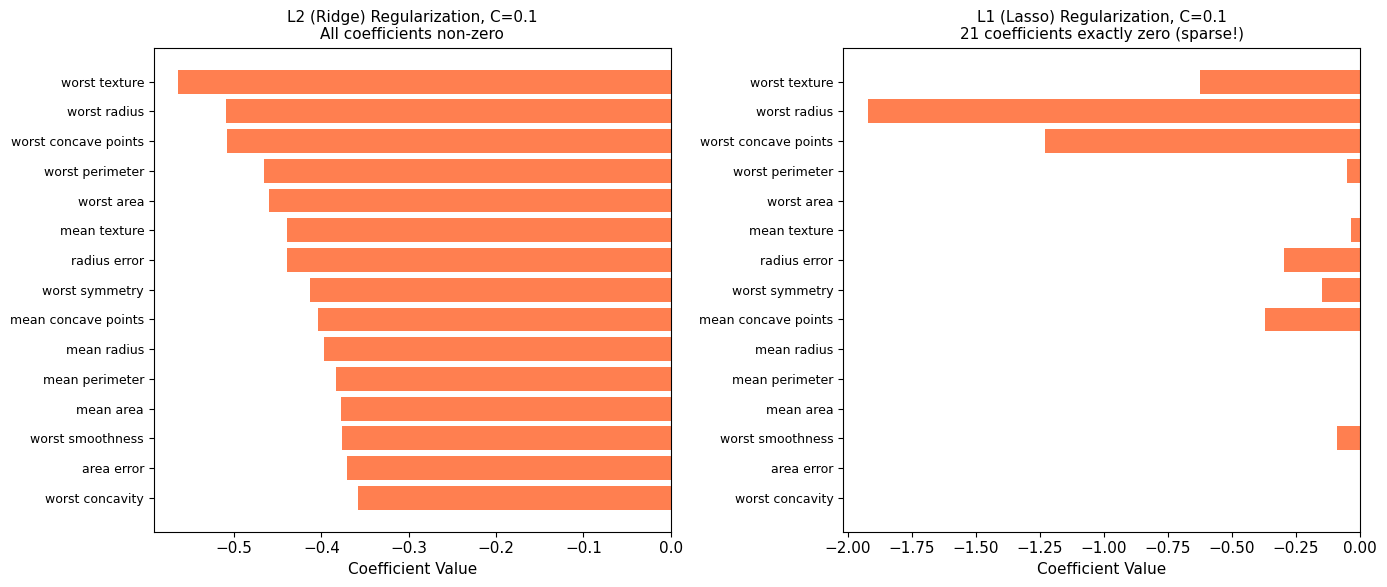

In [ ]:
# Visualize coefficient comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sort by L2 coefficient magnitude
sorted_idx = np.argsort(np.abs(logreg_l2.coef_[0]))[::-1][:15]

# L2 coefficients
ax = axes[0]
coefs_l2 = logreg_l2.coef_[0][sorted_idx]
colors = ['coral' if c < 0 else 'steelblue' for c in coefs_l2]
ax.barh(range(15), coefs_l2, color=colors)
ax.set_yticks(range(15))
ax.set_yticklabels([cancer.feature_names[i] for i in sorted_idx], fontsize=9)
ax.set_xlabel('Coefficient Value')
ax.set_title(f'L2 (Ridge) Regularization, C={C}\nAll coefficients non-zero', fontsize=11)
ax.axvline(x=0, color='black', linewidth=0.5)
ax.invert_yaxis()

# L1 coefficients
ax = axes[1]
coefs_l1 = logreg_l1.coef_[0][sorted_idx]
colors = ['coral' if c < 0 else 'steelblue' if c > 0 else 'lightgray' for c in coefs_l1]
ax.barh(range(15), coefs_l1, color=colors)
ax.set_yticks(range(15))
ax.set_yticklabels([cancer.feature_names[i] for i in sorted_idx], fontsize=9)
ax.set_xlabel('Coefficient Value')
n_zero_l1 = np.sum(logreg_l1.coef_ == 0)
ax.set_title(f'L1 (Lasso) Regularization, C={C}\n{n_zero_l1} coefficients exactly zero (sparse!)', fontsize=11)
ax.axvline(x=0, color='black', linewidth=0.5)
ax.invert_yaxis()

plt.tight_layout()
plt.show()

## EXERCISE 4: Regularization Comparison

1. Train three logistic regression models with C = 0.01 (strong regularization):
   - L2 penalty (default)
   - L1 penalty
   - No penalty
2. Compare their test accuracies
3. Count how many coefficients are exactly zero for each model
4. Which model would you choose and why?

In [ ]:
# 1. Train three models with C = 0.01

# Write your code here


In [ ]:
#@title Click to reveal solution.

# 1. Train three models with C = 0.01
C = 0.01

# L2 (Ridge)
model_l2 = LogisticRegression(C=C, penalty='l2', random_state=42, max_iter=1000)
model_l2.fit(X_train_scaled, y_train)

# L1 (Lasso)
model_l1 = LogisticRegression(C=C, penalty='l1', solver='saga', random_state=42, max_iter=1000)
model_l1.fit(X_train_scaled, y_train)

# No penalty
model_none = LogisticRegression(penalty=None, random_state=42, max_iter=1000)
model_none.fit(X_train_scaled, y_train)

print("All three models trained!")

In [ ]:
# 2. Compare test accuracies

# Write your code here


In [ ]:
#@title Click to reveal solution.

# 2. Compare test accuracies
print("Test Accuracies:")
print("=" * 40)
print(f"L2 (Ridge):    {model_l2.score(X_test_scaled, y_test):.4f}")
print(f"L1 (Lasso):    {model_l1.score(X_test_scaled, y_test):.4f}")
print(f"No penalty:    {model_none.score(X_test_scaled, y_test):.4f}")

In [ ]:
# 3. Count zero coefficients

# Write your code here


In [ ]:
#@title Click to reveal solution.

# 3. Count zero coefficients
print("\nCoefficient Sparsity:")
print("=" * 40)
print(f"L2 (Ridge):    {np.sum(model_l2.coef_ == 0):2d} zero coefficients out of 30")
print(f"L1 (Lasso):    {np.sum(model_l1.coef_ == 0):2d} zero coefficients out of 30")
print(f"No penalty:    {np.sum(model_none.coef_ == 0):2d} zero coefficients out of 30")

In [ ]:
# 4. Which model would you choose?

# Write your reasoning here as comments


In [ ]:
#@title Click to reveal solution.

# 4. Which model would you choose?
print("Model Selection Reasoning:")
print("=" * 50)
print("""
For this dataset, the choice depends on your priorities:

• If accuracy is the only concern:
  → Choose the model with highest test accuracy

• If interpretability matters (medical diagnosis!):
  → L1 (Lasso) is attractive because it selects only the
    most important features, making the model easier to explain

• If you want to avoid overfitting:
  → L2 (Ridge) provides good regularization while keeping
    all features in the model

• In practice:
  → Use cross-validation to find the best C value
  → Consider the domain requirements (here: medical diagnosis
    favors interpretable models)
""")

# Visualize comparison
fig, ax = plt.subplots(figsize=(10, 5))
models = ['L2 (Ridge)', 'L1 (Lasso)', 'No Penalty']
accuracies = [model_l2.score(X_test_scaled, y_test),
              model_l1.score(X_test_scaled, y_test),
              model_none.score(X_test_scaled, y_test)]
n_zeros = [np.sum(model_l2.coef_ == 0),
           np.sum(model_l1.coef_ == 0),
           np.sum(model_none.coef_ == 0)]

x = np.arange(len(models))
width = 0.35

bars1 = ax.bar(x - width/2, accuracies, width, label='Test Accuracy', color='steelblue')
ax2 = ax.twinx()
bars2 = ax2.bar(x + width/2, n_zeros, width, label='Zero Coefficients', color='coral')

ax.set_ylabel('Test Accuracy', color='steelblue')
ax2.set_ylabel('Zero Coefficients', color='coral')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_title('Regularization Comparison (C=0.01)')
ax.set_ylim(0.9, 1.0)
ax2.set_ylim(0, 30)

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

---
# Summary

In this notebook, you learned:

1. **The Sigmoid Function**: Maps any real number to (0, 1) — perfect for probabilities

2. **Logistic Regression Workflow**: Linear combination → Sigmoid → Probability → Threshold

3. **Decision Boundaries**: Where P(y=1) = 0.5; linear by default, but polynomial features enable curved boundaries

4. **Binary Cross-Entropy Loss**: Penalizes confident wrong predictions heavily

5. **Sklearn Implementation**: `fit()`, `predict()`, `predict_proba()`, and coefficient interpretation

6. **Regularization**: L1 for sparsity/feature selection, L2 for stability; C controls strength

**Coming Next**: How do we know if our classifier is actually good? Accuracy alone can be misleading! We'll cover confusion matrices, precision, recall, F1-score, and ROC curves.